## Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import os
import pandas as pd
import seaborn as sns

## Load Data

In [2]:
DATA_FOLDER_PATH = os.path.normpath(os.path.join(os.getcwd(), "..", "data"))
anxiety_depression_raw_df = pd.read_csv(os.path.join(DATA_FOLDER_PATH, "Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv"))

In [3]:
anxiety_depression_raw_df.head(5)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


## Process Data

In [4]:
anxiety_depression_df = anxiety_depression_raw_df[[
    "Indicator",
    "Group",
    "State",
    "Subgroup",
    "Time Period Start Date",
    "Time Period End Date",
    "Value",
    "Low CI",
    "High CI"
]]

anxiety_depression_df = anxiety_depression_df[
    (anxiety_depression_df["Indicator"] == "Symptoms of Depressive Disorder")
    & (anxiety_depression_df["Group"] == "By Age")
    & (anxiety_depression_df["Group"] == "By Age")
    & (anxiety_depression_df["Subgroup"].isin(["18 - 29 years", "40 - 49 years", "60 - 69 years"])) # select target age groups
]


In [5]:
anxiety_depression_df.head(5)

,Indicator,Group,State,Subgroup,Time Period Start Date,Time Period End Date,Value,Low CI,High CI
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,04/23/2020,05/05/2020,32.7,30.2,35.2
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,04/23/2020,05/05/2020,24.8,23.3,26.2
5,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,04/23/2020,05/05/2020,18.4,17.0,19.7
211,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,05/07/2020,05/12/2020,36.2,32.2,40.2
213,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,05/07/2020,05/12/2020,25.5,23.1,28.0


### Remove NaNs

In [6]:
anxiety_depression_df[anxiety_depression_df.isna().any(axis=1)]

,Indicator,Group,State,Subgroup,Time Period Start Date,Time Period End Date,Value,Low CI,High CI
2524,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,07/22/2020,08/18/2020,NaN,NaN,NaN
2526,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,07/22/2020,08/18/2020,NaN,NaN,NaN
2528,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,07/22/2020,08/18/2020,NaN,NaN,NaN
4471,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,12/22/2020,01/05/2021,NaN,NaN,NaN
4473,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,12/22/2020,01/05/2021,NaN,NaN,NaN
4475,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,12/22/2020,01/05/2021,NaN,NaN,NaN
5791,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,03/30/2021,04/13/2021,NaN,NaN,NaN
5793,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,03/30/2021,04/13/2021,NaN,NaN,NaN
5795,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,03/30/2021,04/13/2021,NaN,NaN,NaN
7145,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,07/06/2021,07/20/2021,NaN,NaN,NaN


In [7]:
anxiety_depression_df = anxiety_depression_df.dropna()

### Consider Midpoint of Time Intervals

In [8]:
anxiety_depression_df["Time Period Start Date"] = pd.to_datetime(anxiety_depression_df["Time Period Start Date"])
anxiety_depression_df["Time Period End Date"] = pd.to_datetime(anxiety_depression_df["Time Period End Date"])
anxiety_depression_df["Time Period Midpoint"] = anxiety_depression_df["Time Period Start Date"] + (anxiety_depression_df["Time Period End Date"] - anxiety_depression_df["Time Period Start Date"]) / 2

In [9]:
anxiety_depression_df.head(5)

,Indicator,Group,State,Subgroup,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Time Period Midpoint
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,2020-04-23,2020-05-05,32.7,30.2,35.2,2020-04-29 00:00:00
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,2020-04-23,2020-05-05,24.8,23.3,26.2,2020-04-29 00:00:00
5,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,2020-04-23,2020-05-05,18.4,17.0,19.7,2020-04-29 00:00:00
211,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,2020-05-07,2020-05-12,36.2,32.2,40.2,2020-05-09 12:00:00
213,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,2020-05-07,2020-05-12,25.5,23.1,28.0,2020-05-09 12:00:00


### Handle Columns

In [10]:
# drop columns
anxiety_depression_df = anxiety_depression_df.drop(columns=[
    "Indicator",
    "Group",
    "State",
    "Time Period Start Date",
    "Time Period End Date"
])

# reorder columns
anxiety_depression_df = anxiety_depression_df[[
    "Subgroup",
    "Time Period Midpoint",
    "Low CI",
    "Value",
    "High CI"
]]

# rename columns
anxiety_depression_df.columns = [
    "age",
    "date",
    "low_ci",
    "rate",
    "high_ci"
]

In [11]:
anxiety_depression_df.head(5)

,age,date,low_ci,rate,high_ci
1,18 - 29 years,2020-04-29 00:00:00,30.2,32.7,35.2
3,40 - 49 years,2020-04-29 00:00:00,23.3,24.8,26.2
5,60 - 69 years,2020-04-29 00:00:00,17.0,18.4,19.7
211,18 - 29 years,2020-05-09 12:00:00,32.2,36.2,40.2
213,40 - 49 years,2020-05-09 12:00:00,23.1,25.5,28.0


## Plot Line Graph

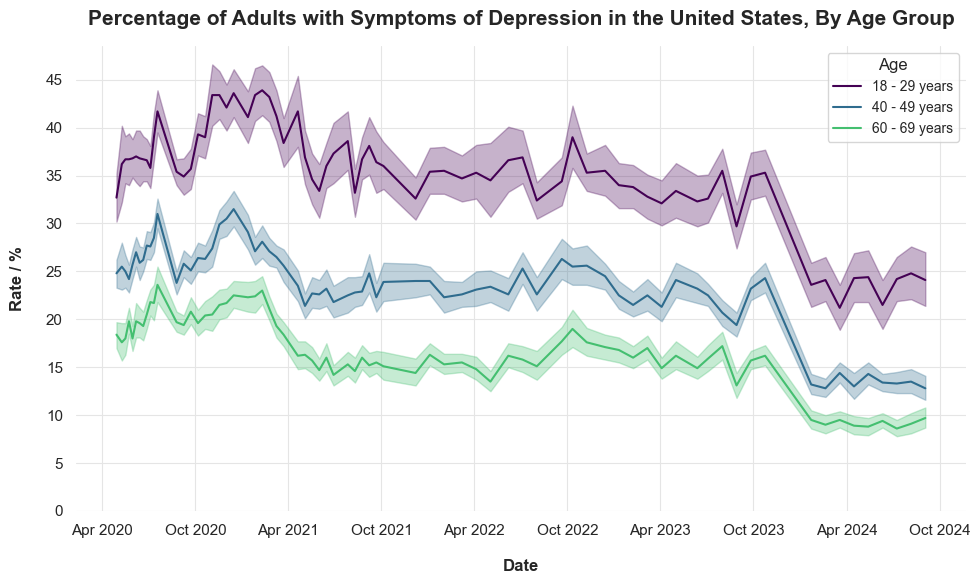

In [12]:
# set graph theme (similar to theme_minimal() in ggplot2) and viridis colour palette
cmap = plt.cm.viridis
palette = [cmap(0), cmap(0.35), cmap(0.7)]
sns.set_theme(
    style="whitegrid",
    palette=palette,
    rc={
        "axes.facecolor": "white",
        "figure.facecolor": "white",
        "axes.edgecolor": "white",
        "grid.color": "#e5e5e5",
        "grid.linewidth": 0.8,
        "axes.spines.left": False,
        "axes.spines.bottom": False,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
)

fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=anxiety_depression_df, x="date", y="rate", hue="age")

# add confidence intervals to the graph (from anxiety_depression_df)
for grp, age_df in anxiety_depression_df.groupby("age"):
    age_df = age_df.sort_values("date")

    # get the color seaborn used for this group
    col = ax.get_lines()[list(anxiety_depression_df["age"].unique()).index(grp)].get_color()

    plt.fill_between(
        age_df["date"],
        age_df["low_ci"],
        age_df["high_ci"],
        color=col,
        alpha=0.3
    )

# edit x axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

# edit y axis
ax.set_ylim(bottom=0)
ax.yaxis.set_major_locator(mticker.MultipleLocator(5))

# edit labels and legends
ax.set_title(
    "Percentage of Adults with Symptoms of Depression in the United States, By Age Group",
    fontweight="bold",
    fontsize=15,
    pad=15
)
ax.set_xlabel("Date", labelpad=15, fontweight="bold", fontsize=12)
ax.set_ylabel("Rate / %", labelpad=15, fontweight="bold", fontsize=12)
ax.legend(
    title="Age",
    fontsize=10,
    title_fontsize=12
)

plt.tight_layout()

# save plot
PLOTS_FOLDER_PATH = os.path.normpath(os.path.join(os.getcwd(), "..", "plots"))
os.makedirs(PLOTS_FOLDER_PATH, exist_ok=True)
plt.savefig(os.path.join(PLOTS_FOLDER_PATH, "plot1.png"))

plt.show()